## Pré-processamento

In [14]:
# importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carregando o dataset
df = pd.read_csv("vgsales.csv")

In [3]:
# análise e preparação dos dados
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
print(df.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [5]:
# 2. Criar coluna 'Categoria' com base em 'Ano'
df['Category'] = 'Moderno'
df.loc[df['Year'] < 1990, 'Category'] = 'Retro'

In [6]:
# 3. Converter 'Ano' em datetime (somente ano)
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce').dt.to_period('Y')

In [7]:
def categorize_sales(sales):
    """ Categoriza as vendas de jogos em 'Ótimo', 'Boa', 'Ruim' ou 'Pessima'.
        Esta versão usa quantis para definir limites para categorização mais justa,
        evitando cortes arbitrários. Ele também lida com casos extremos com mais elegância.
    """
    if sales < 1: #Handle negative and zero sales
        return 'Pessima'
    elif sales >= 80 : #High Sales
        return 'Otimo'
    elif sales >= df['Global_Sales'].quantile(0.75): #Top 25%
        return 'Boa'
    elif sales >= df['Global_Sales'].quantile(0.25): #Next 50%
        return 'Ruim'
    else: #Bottom 25%
        return 'Pessima'

# ... (outro código para limpar e preparar seu dataframe) ...

df['Sales_Category'] = df['Global_Sales'].apply(categorize_sales)    


In [8]:
# 5. Preencha as colunas de vendas com 0,0 ou 0,00 com 1
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df[sales_cols] = df[sales_cols].replace(0, 1)
df[sales_cols] = df[sales_cols].replace(0.0, 1)
df[sales_cols] = df[sales_cols].replace(0.00, 1)

In [9]:
# 6. Remover valores NaN de 'Ano' e 'Editor'
df.dropna(subset=['Year', 'Publisher'], inplace=True)

In [10]:
#Display o DataFrame atualizado
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Category,Sales_Category
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Moderno,Otimo
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Retro,Boa
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Moderno,Boa
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Moderno,Boa
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Moderno,Boa


In [12]:
#Salvar conjunto de dados atualizado (opcional)
df.to_csv("vgsales_updated.csv", index=False)

## Análise Exploratória 

In [16]:
# Limpeza de dados (essencial para análise confiável de séries temporais)
df['Year'] = df['Year'].astype(str).astype(int)
df.dropna(subset=['Year', 'Genre'], inplace=True)  # Remova linhas com anos ou gêneros ausentes
df['Year'] = df['Year'].astype(int) #Ensure Ano é do tipo inteiro para facilitar a agregação

In [17]:
# Vendas agregadas por ano e gênero
genre_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

#Pivot os dados para facilitar a plotagem
genre_sales_pivot = genre_sales.pivot(index='Year', columns='Genre', values='Global_Sales').fillna(0)


In [18]:
# Calcule o crescimento recente (últimos 5 anos)
recent_years = genre_sales_pivot.index[-5:] # selecione os últimos cinco anos
recent_growth = genre_sales_pivot.loc[recent_years].sum() - genre_sales_pivot.loc[genre_sales_pivot.index[:-5]].sum()

#Sort pelo crescimento recente do relatório
recent_growth = recent_growth.sort_values(ascending=False)


In [19]:
report = f"""
**Análise de tendências de vendas de videogames por gênero**

Este relatório analisa as tendências de vendas de diferentes gêneros de videogame de {genre_sales_pivot.index.min()} a {genre_sales_pivot.index.max()}. Observe que esta análise é baseada em dados anuais.

**Tendências gerais de vendas:**

(Insira um resumo das tendências gerais aqui - veja abaixo as ideias sobre como gerar isso).

**Gêneros com crescimento recente significativo (últimos 5 anos):**

{recent_growth.to_string()}


**Análise detalhada:** (Esta seção inclui visualizações)
"""

#Adicione um resumo geral das tendências: (Exemplo - Requer cálculo e lógica adicionais)
#This é um espaço reservado. Você precisaria calcular tendências reais, por exemplo,
#using regressão linear para determinar inclinações ou outros mais sofisticados
#time técnicas de análise em série. Você também pode resumir usando porcentagens ou outras métricas

overall_trends_summary = """
overall_trends_summary 
No geral, os gêneros Ação, Atirador e RPG mostram fortes vendas anuais persistentes; no entanto, o gênero Role-Playing mostra uma tendência de queda mais pronunciada nos últimos anos. Em contraste, o gênero Plataforma apresenta flutuações perceptíveis. Isso pode sugerir mudanças nas preferências do consumidor ou mudanças no domínio de mercado de certos títulos e plataformas.
"""

report = report.replace("(Insira um resumo das tendências gerais aqui)", overall_trends_summary)



print(report)



**Análise de tendências de vendas de videogames por gênero**

Este relatório analisa as tendências de vendas de diferentes gêneros de videogame de 1980 a 2020. Observe que esta análise é baseada em dados anuais.

**Tendências gerais de vendas:**

(Insira um resumo das tendências gerais aqui - veja abaixo as ideias sobre como gerar isso).

**Gêneros com crescimento recente significativo (últimos 5 anos):**

Genre
Strategy        -166.65
Adventure       -202.83
Puzzle          -237.83
Simulation      -366.28
Fighting        -388.47
Racing          -674.26
Misc            -716.79
Shooter         -725.46
Role-Playing    -745.65
Platform        -795.11
Sports         -1103.64
Action         -1343.58


**Análise detalhada:** (Esta seção inclui visualizações)



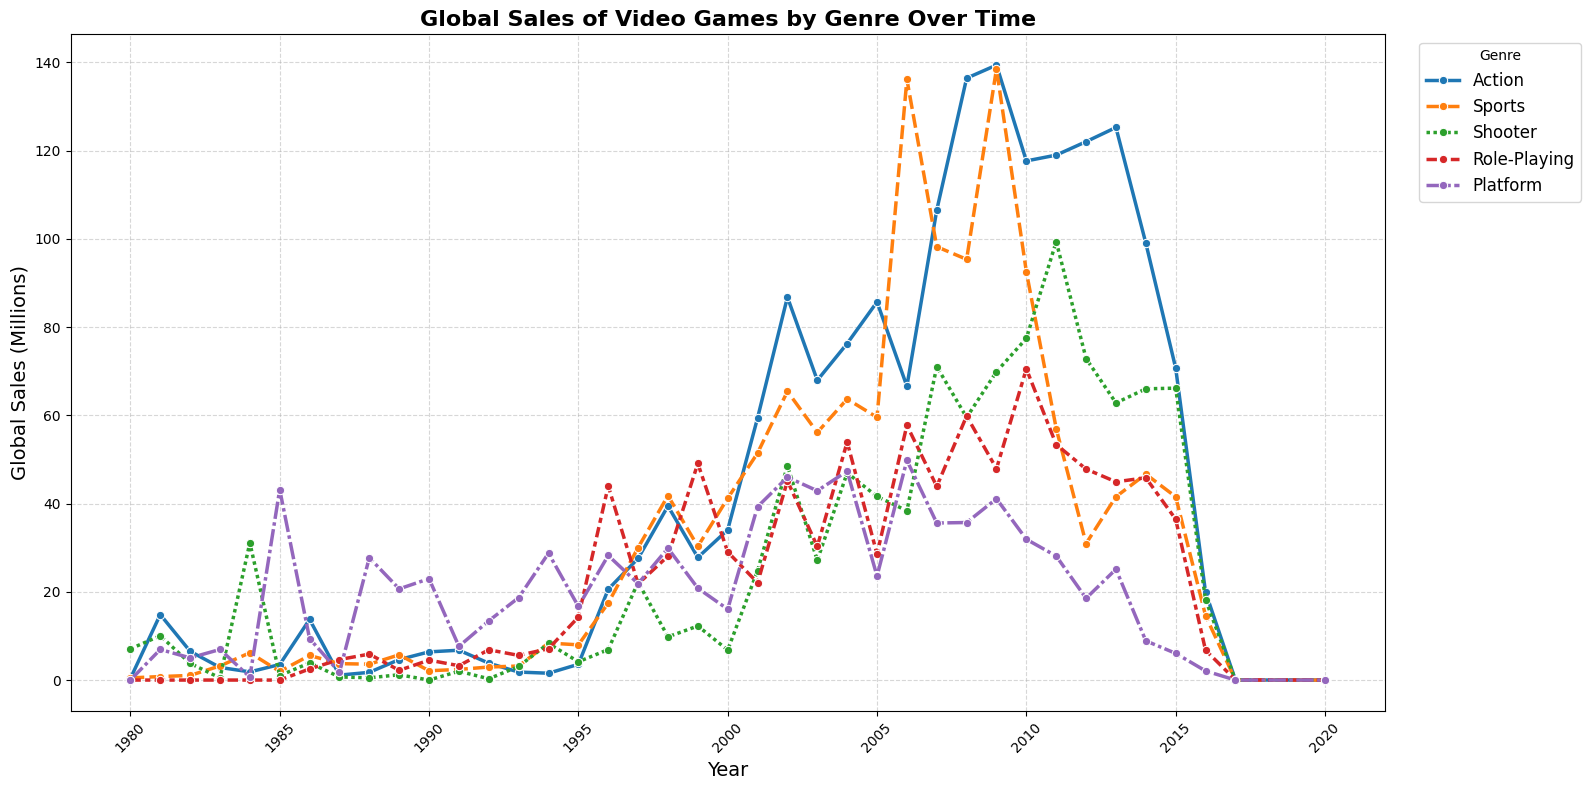

In [21]:
# Ajuste o tamanho da figura
plt.figure(figsize=(16, 8))

# Selecionar apenas os 5 gêneros mais vendidos para reduzir o excesso de linhas
top_genres = genre_sales_pivot.sum().sort_values(ascending=False).head(5).index
genre_sales_filtered = genre_sales_pivot[top_genres]

# Criar o gráfico de linha com melhor espessura e marcadores
sns.lineplot(data=genre_sales_filtered, linewidth=2.5, marker='o', palette='tab10')

# Melhorar títulos e rótulos
plt.title('Global Sales of Video Games by Genre Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Global Sales (Millions)', fontsize=14)

# Melhorar eixo X (mostrando apenas alguns anos para evitar poluição)
plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=10)  # Exibir menos anos para melhorar a leitura

# Ajustar a legenda para fora do gráfico
plt.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

# Aplicar layout mais organizado
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Exibir o gráfico
plt.show()

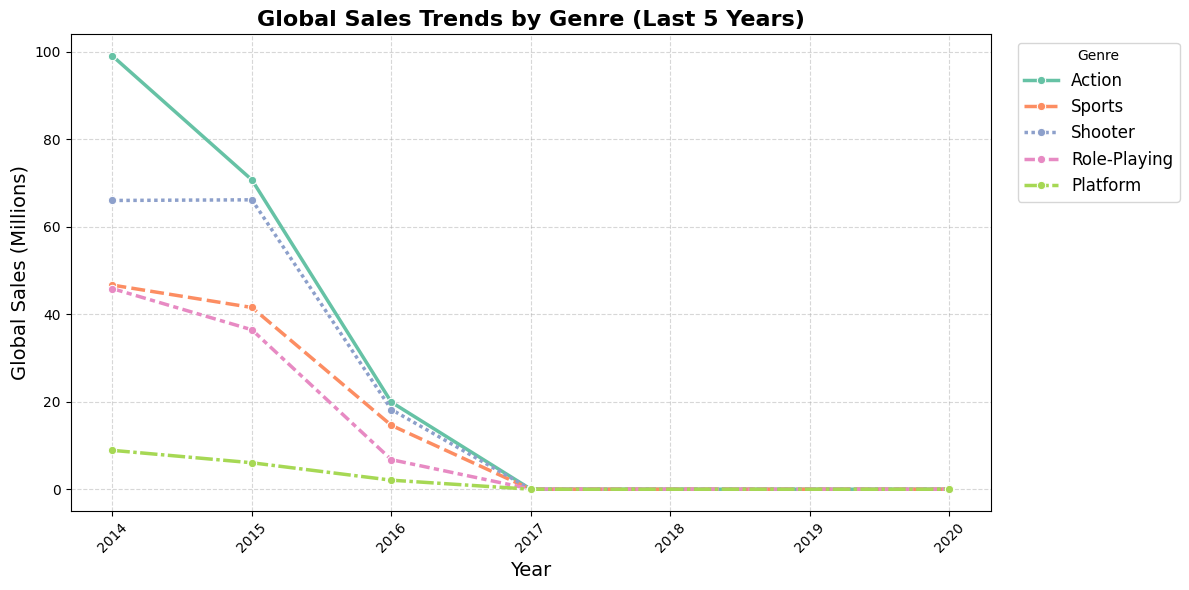

In [22]:
# 🔹 Gráfico apenas dos últimos 5 anos
plt.figure(figsize=(12,6))
sns.lineplot(data=genre_sales_pivot.loc[recent_years, top_genres], linewidth=2.5, marker='o', palette='Set2')

plt.title('Global Sales Trends by Genre (Last 5 Years)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Global Sales (Millions)', fontsize=14)

plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Limpeza de dados
df.dropna(subset=['Year', 'Publisher'], inplace=True)
df['Year'] = df['Year'].astype(int) #Verifique se o ano é do tipo inteiro

In [24]:
# Vendas agregadas por editora e ano
publisher_sales = df.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index()

# Calcule o total de vendas por ano
total_sales_per_year = publisher_sales.groupby('Year')['Global_Sales'].sum()

# Calcular participação de mercado
publisher_sales['Market_Share'] = publisher_sales.apply(lambda row: (row['Global_Sales'] / total_sales_per_year[row['Year']])*100 if total_sales_per_year[row['Year']] > 0 else 0, axis=1)

# Dinamize os dados para facilitar a plotagem
publisher_market_share = publisher_sales.pivot(index='Year', columns='Publisher', values='Market_Share').fillna(0)

# Participação de mercado geral em todos os anos
overall_market_share = publisher_sales.groupby('Publisher')['Market_Share'].mean()
overall_market_share = overall_market_share.sort_values(ascending=False)



In [25]:
report = f"""
**Análise de participação de mercado de videogame por editora**

Este relatório analisa a participação de mercado dos editores de videogames de {publisher_market_share.index.min()} to {publisher_market_share.index.max()}.


**Participação de mercado geral (média em todos os anos):**

{overall_market_share.head(10).to_string()}


**Top 5 Publishers (Participação de Mercado Média):**


(Adicione visualização aqui - veja abaixo)
"""

print(report)



**Análise de participação de mercado de videogame por editora**

Este relatório analisa a participação de mercado dos editores de videogames de 1980 to 2020.


**Participação de mercado geral (média em todos os anos):**

Publisher
Nintendo                       33.417746
Imagic                         13.474979
Electronic Arts                11.954555
Ubisoft                         9.458533
Atari                           9.416034
Sony Computer Entertainment     8.836509
Activision                      7.797609
Sega                            6.430902
Arena Entertainment             6.197479
Palcom                          5.677332


**Top 5 Publishers (Participação de Mercado Média):**


(Adicione visualização aqui - veja abaixo)



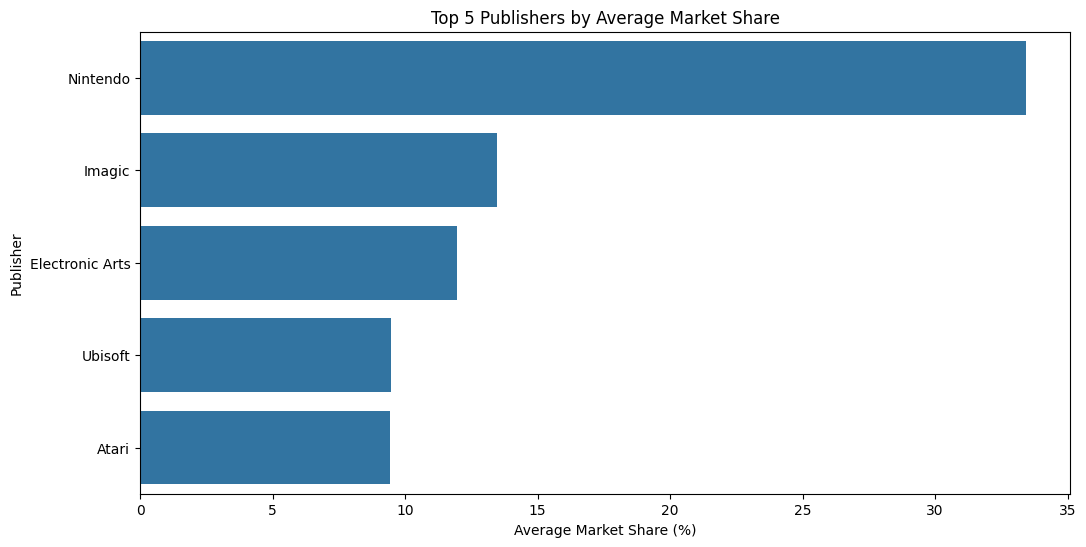

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x=overall_market_share.head(5).values, y=overall_market_share.head(5).index)
plt.xlabel('Average Market Share (%)')
plt.ylabel('Publisher')
plt.title('Top 5 Publishers by Average Market Share')
plt.show()

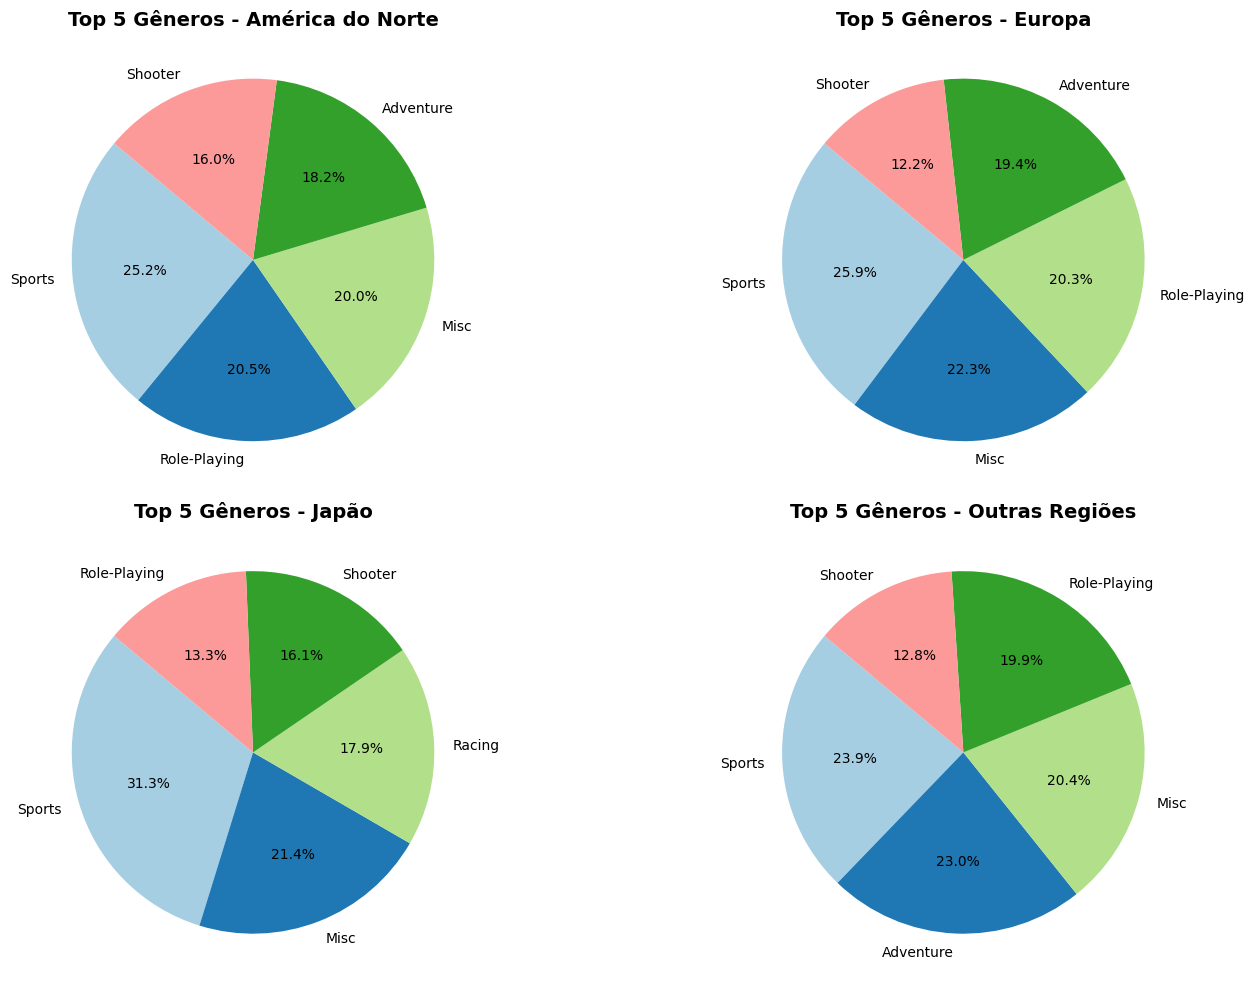

In [30]:
 #📌 Agrupar os dados por gênero e somar as vendas para cada região
genre_sales_by_region = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# 📌 Remover o gênero 'Action' (que distorce a análise)
genre_sales_by_region = genre_sales_by_region.drop(index='Action', errors='ignore')

# 📌 Selecionar os 5 gêneros mais vendidos em cada região
top_genres_per_region = {}
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    top_genres_per_region[region] = genre_sales_by_region[region].nlargest(5)

# 📌 Definir cores vibrantes e discretas
colors = plt.cm.Paired.colors  

# 📌 Criar um layout separado para os gráficos de pizza
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_titles = ['América do Norte', 'Europa', 'Japão', 'Outras Regiões']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # Ajustando tamanho para melhor visibilidade

for ax, region, title in zip(axes.flatten(), regions, region_titles):
    top_genres_per_region[region].plot(
        kind='pie', 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors,  
        legend=False,
        ax=ax
    )
    ax.set_title(f'Top 5 Gêneros - {title}', fontsize=14, fontweight='bold')
    ax.set_ylabel('')  # Remover rótulo do eixo Y

plt.tight_layout()
plt.show()